###### Encoder and Decoder using Autoencoder

In [37]:
## Import necessary Libraries,

from keras.datasets import mnist ## For reading mist data set.
from keras.layers import Dropout ## For Droput/Regularization .
from keras.layers import Input, Dense ## Input,Output layer for neural network.
from keras.models import Model ## Neural Network.
import numpy as np ## Numpy Library.
import os ## Import OS library to get conection with local machine and get access of  system properties.
from IPython.display import Image ## Import Image library for displayinng image.
import matplotlib.pyplot as plt ## For Visualization.

In [5]:
## Get current working directory path.
PATH = os.getcwd()
PATH

'D:\\Python\\Auto Encoder - Deep Leaning'

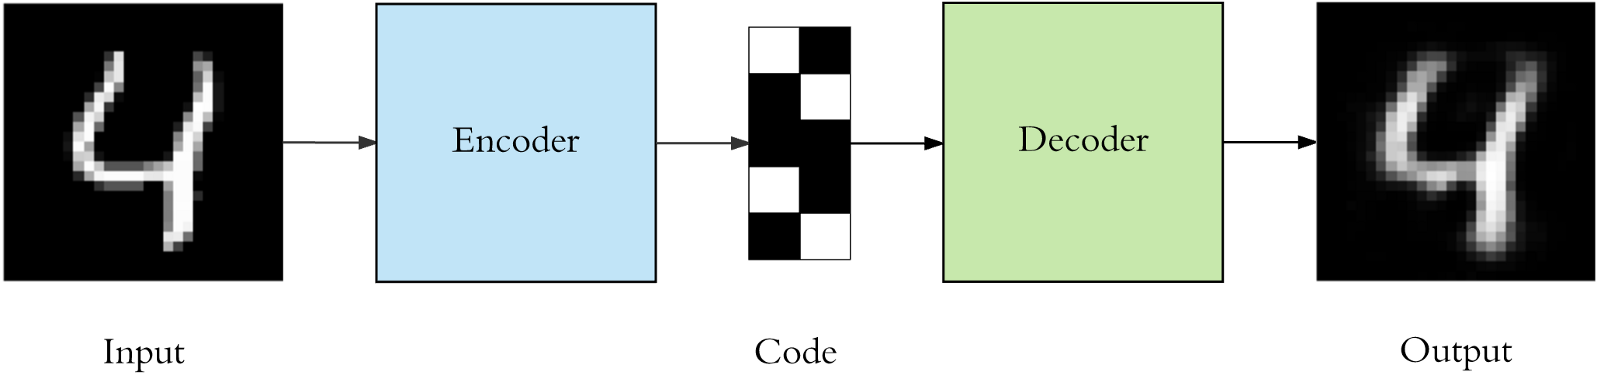

In [6]:
## Load and display image.
Image(filename='encodeco.png')

In [7]:
## Load mnist data which is available in keras.datasets library.
(x_train, _), (x_test, _) = mnist.load_data()

In [13]:
## Check the dimension of the train and validation data.
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [8]:
## Check Train data.
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [9]:
## Get first record from train data.
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [10]:
## Get first row and column from train data.
x_train[0][0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8)

In [11]:
## Get 15 element from first record.
x_train[0][5][15]

18

In [12]:
## Get the sum of train data.
sum(x_train)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 126,
        214, 216,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  16,  55,  45, 177,  63,   6,  40, 172, 211,
        150,  95, 209, 208,   3, 119, 178, 157,   2,  93, 212,   0,   0,
          0,   0],
       [  0,   0,  64,  42, 161,  73,  10, 112, 235, 189,  40,  93,  93,
        245,  97, 189,  87,  33, 240,  39, 191, 119, 106,   7,  65,   6,
          0,   0],
       [  0,   0, 194,  95, 209,  90, 181, 254, 145,  90,  10, 136,   7,
        172,  25, 130,  21, 203, 204, 135, 227,  30, 174, 208, 253, 130,
        168,   0],
       [  0,  38,  57,  93, 245,  37, 130,   5,  81, 113, 152, 254, 185,
        218, 112,  20, 234, 199, 141, 204,   5,   4, 238, 221,  62, 177,
        243, 122],
       [  0,   0, 107, 217, 176, 252, 227,   5, 227, 243, 232, 222, 151,
        217, 244,  83, 140, 123,  89, 110, 190, 104, 251,  11, 107, 188,
         50,  26],
       [  

In [14]:
## Normalize the data,it will make model job easy for computation.
x_train = x_train.astype('float32')/255. ### Picxel range will vary from 0-255 so that's why we are dividinng with 255.
x_test = x_test.astype('float32')/255.

In [15]:
## Check train data after normalization.
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [16]:
## Check first record of train data after normalization.
x_train[0][0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [18]:
## Check dimensions of train and test.
print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [16]:
## Check number of train data records.
x_train.shape[0]

60000

In [19]:
## Get mutiplication of train data dimensions.
np.prod(x_train.shape[1:]) ### 28 * 28 = 784

784

In [20]:
## Reshape train and test dimensions.
x_train = x_train.reshape(x_train.shape[0], np.prod(x_train.shape[1:]))
x_test = x_test.reshape(x_test.shape[0], np.prod(x_test.shape[1:]))

## Display dimensions of train and test.
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


#### Fully-connected neural layer as encoder and as decoder:

In [22]:
## The size of encoded and actual representations.
encoding_dim = 32 
actual_dim = x_train.shape[1] #784

In [23]:
## Input placeholder.
input_img = Input(shape=(actual_dim,))

## "encoded" is the encoded representation of the input.
encoded = Dense(encoding_dim, activation='relu')(input_img) ## Fully connected encoded layer with Relu as activation function.

## "decoded" is the lossy reconstruction of the input.
decoded = Dense(actual_dim, activation='sigmoid')(encoded)## Fully connnected decoded layer with signoid as activation function.

In [25]:
## This model maps an input to its reconstruction.
autoencoder = Model(input_img, decoded)

In [26]:
## Print Model summary.
print(autoencoder.summary())  ### 1) param = 784*32+32=25120 2) param = 32*784+784 = 25872 

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________
None


In [27]:
## This model maps an input to its encoded representation.
encoder = Model(input_img, encoded)

In [28]:
## Print model summary.
print(encoder.summary())

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________
None


In [32]:
## Create a placeholder for an encoded (32-dimensional) input.
encoded_input = Input(shape=(encoding_dim,))

## Retrieve the last layer of the autoencoder model.
decoder_layer = autoencoder.layers[-1](encoded_input)

## Create the decoder model.
decoder = Model(encoded_input, decoder_layer)

In [33]:
## Print decoder model summary.
print(decoder.summary())

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 25,872
Trainable params: 25,872
Non-trainable params: 0
_________________________________________________________________
None


In [34]:
## Add optimizer,loss function to autoencoder model.
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [35]:
## Fit autoencoder model.
autoencoder.fit(x_train, x_train, ## train and validation data.
                epochs=50, ## Number of times the complete data has to show to the model.
                batch_size=256, ## At a time how many records has to process.
                shuffle=True, ## Boolean (whether to shuffle the training data before each epoch).
                validation_data=(x_test, x_test)) ## Data on which to evaluate the loss and any model metrics at the end of each epoch.

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.3570 - val_loss: 0.2715
Epoch 2/50
60000/60000 [==============================] - 2s 26us/step - loss: 0.2646 - val_loss: 0.2542
Epoch 3/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.2432 - val_loss: 0.2306
Epoch 4/50
60000/60000 [==============================] - 1s 22us/step - loss: 0.2225 - val_loss: 0.2126
Epoch 5/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.2074 - val_loss: 0.1999
Epoch 6/50
60000/60000 [==============================] - 1s 23us/step - loss: 0.1966 - val_loss: 0.1906
Epoch 7/50
60000/60000 [==============================] - 1s 23us/step - loss: 0.1882 - val_loss: 0.1833
Epoch 8/50
60000/60000 [==============================] - 1s 23us/step - loss: 0.1813 - val_loss: 0.1769
Epoch 9/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.1753 - val_loss: 0.1713
Epoch

#### Visualize the reconstructed inputs and the encoded representations using Matplotlib.

In [36]:
## Note that we take them from the *test* set
## Get the predictions for the test data'
encoded_imgs = encoder.predict(x_test)
## Get the predictions on encoded data.
decoded_imgs = decoder.predict(encoded_imgs)

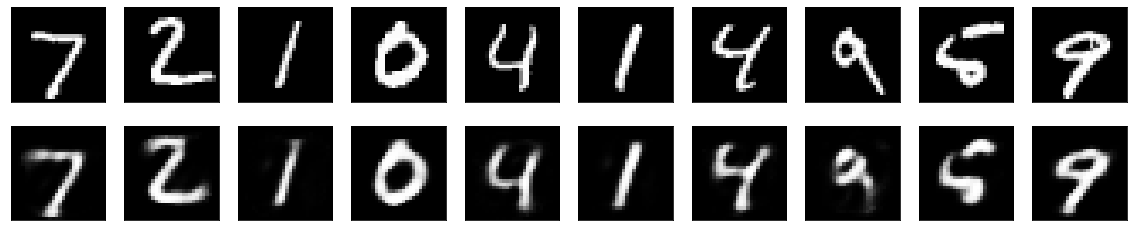

In [41]:
n = 10  ## How many images we want display.
plt.figure(figsize=(20, 4)) ## Figue size. 
for i in range(n):
    ## Display original
    ax = plt.subplot(2, n, i + 1) ## Position of the image to display.
    plt.imshow(x_test[i].reshape(28, 28)) ## Reshape image and display.
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ## Display reconstruction.
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show() ## Show the plot.

##### Drop Outs

In [42]:
## Input placeholder.
input_img = Input(shape=(actual_dim,))

## 50% of input to drop.
drop = Dropout(0.5)(input_img)
## Print iput shape.
print(input_img)
## Print Dropouts.
print(drop)

Tensor("input_4:0", shape=(None, 784), dtype=float32)
Tensor("dropout_1/cond/Identity:0", shape=(None, 784), dtype=float32)


In [43]:
## "encoded" is the encoded representation of the input.
encoded = Dense(encoding_dim, activation='relu')(drop) ## sending drop outs layer as input to fully connected encode layer.
print(encoded)

Tensor("dense_3/Relu:0", shape=(None, 32), dtype=float32)


In [44]:
## "decoded" is the lossy reconstruction of the input.
decoded = Dense(actual_dim, activation='sigmoid')(encoded)
print(decoded)

Tensor("dense_4/Sigmoid:0", shape=(None, 784), dtype=float32)


In [45]:
## Input placeholder.
input_img = Input(shape=(actual_dim,))

drop = Dropout(0.5)(input_img) ## 50% drop outs the inputs.

## "encoded" is the encoded representation of the input.
encoded = Dense(encoding_dim, activation='relu')(drop)

## "decoded" is the lossy reconstruction of the input.
decoded = Dense(actual_dim, activation='sigmoid')(encoded)

## This model maps an input to its reconstruction.
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 33us/step - loss: 0.3622 - val_loss: 0.2707
Epoch 2/50
60000/60000 [==============================] - 2s 34us/step - loss: 0.2649 - val_loss: 0.2519
Epoch 3/50
60000/60000 [==============================] - 2s 31us/step - loss: 0.2446 - val_loss: 0.2298
Epoch 4/50
60000/60000 [==============================] - 2s 36us/step - loss: 0.2262 - val_loss: 0.2125
Epoch 5/50
60000/60000 [==============================] - 2s 33us/step - loss: 0.2127 - val_loss: 0.2003
Epoch 6/50
60000/60000 [==============================] - 2s 37us/step - loss: 0.2033 - val_loss: 0.1913
Epoch 7/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.1961 - val_loss: 0.1841
Epoch 8/50
60000/60000 [==============================] - 2s 33us/step - loss: 0.1901 - val_loss: 0.1779
Epoch 9/50
60000/60000 [==============================] - 2s 38us/step - loss: 0.1851 - val_loss: 0.1726
Epoch

In [50]:
## Note that we take them from the *test* set
## Get the predictions for the test data.
encoded_imgs = encoder.predict(x_test)
## Get the predictions on encoded data.
decoded_imgs = decoder.predict(encoded_imgs)

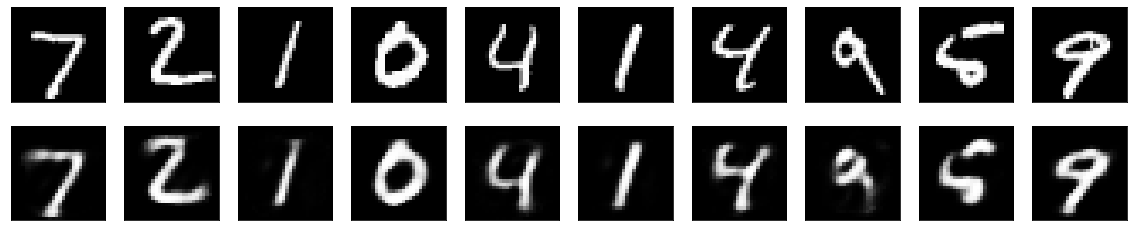

In [51]:
n = 10  ## How many images we want display.
plt.figure(figsize=(20, 4)) ## Figue size. 
for i in range(n):
    ## Display original.
    ax = plt.subplot(2, n, i + 1) ## Position of the image to display.
    plt.imshow(x_test[i].reshape(28, 28)) ## Reshape image and display.
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ## Display reconstruction.
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show() ## Show the plot.